In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
Hr_data = pd.read_csv('archive (1).zip')

In [6]:
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
Hr_data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [12]:
Hr_data.replace({"BusinessTravel":{'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2}},inplace=True)

In [17]:
Hr_data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [18]:
Hr_data.replace({"Attrition":{'No':0,'Yes':1}},inplace=True)

In [20]:
Hr_data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [21]:
Hr_data.replace({"Department":{'Research & Development':0,'Sales':1,'Human Resources':2}},inplace=True)

In [23]:
Hr_data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [24]:
Hr_data.replace({"EducationField":{'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5}},inplace=True)

In [25]:
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
Hr_data.shape

(1470, 35)

In [27]:
Hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
Hr_data.select_dtypes(include="object").columns

Index(['Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype='object')

In [29]:
Hr_data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [30]:
Hr_data.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

In [32]:
Hr_data.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [33]:
Hr_data.replace({"MaritalStatus":{'Married':0,'Single':1,'Divorced':2}},inplace=True)

In [35]:
Hr_data.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [36]:
Hr_data.replace({"JobRole":{'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,
                           'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,
                           'Sales Representative':6,'Research Director':7,'Human Resources':8}},inplace=True)

In [38]:
Hr_data.Over18.value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [39]:
Hr_data.replace({"Over18":{'Y':1}},inplace=True)

In [41]:
Hr_data.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [42]:
Hr_data.replace({"OverTime":{'Yes':0,'No':1}},inplace=True)

<Axes: xlabel='JobRole', ylabel='count'>

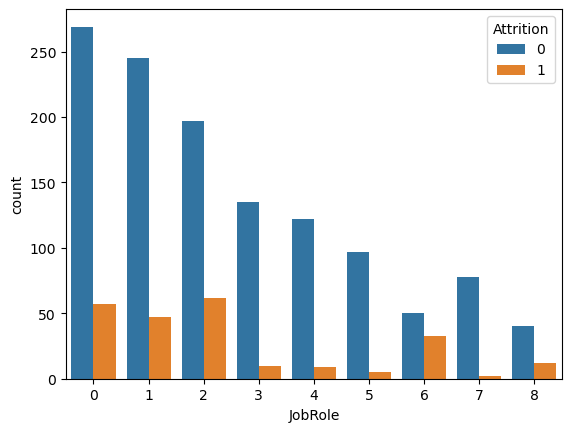

In [44]:
sns.countplot(x='JobRole',hue='Attrition',data=Hr_data)

<Axes: xlabel='Department', ylabel='count'>

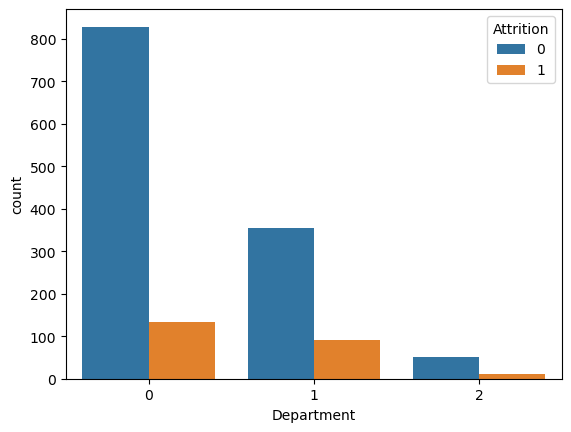

In [45]:
sns.countplot(x='Department',hue='Attrition',data=Hr_data)

<Axes: xlabel='EducationField', ylabel='count'>

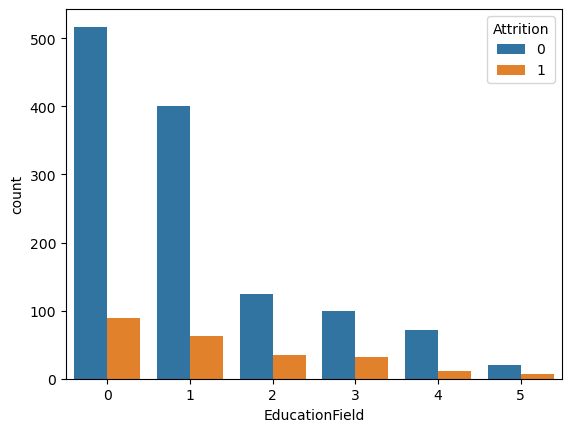

In [46]:
sns.countplot(x='EducationField',hue='Attrition',data=Hr_data)

In [48]:
X = Hr_data.drop('Attrition',axis=1)
Y = Hr_data['Attrition']

In [49]:
print(X)
print(Y)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               0       1102           1                 1          2   
1      49               1        279           0                 8          1   
2      37               0       1373           0                 2          2   
3      33               1       1392           0                 3          4   
4      27               0        591           0                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           0                23          2   
1466   39               0        613           0                 6          1   
1467   27               0        155           0                 4          3   
1468   49               1       1023           1                 2          3   
1469   34               0        628           0                 8          3   

      EducationField  Emplo

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [51]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1470,) (1176,) (294,)


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier()

In [54]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [55]:
X_test_prediction = model.predict(X_test)

data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [56]:
print('Accuracy:', data_accuracy)

Accuracy: 0.8605442176870748
